In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

In [3]:
df = pd.read_csv('../data/sales_data.csv')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [12]:
df.drop('Row ID',axis = 1, inplace = True)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [14]:
df.sort_values(by=['Order Date'], inplace=True, ascending=True)
df.set_index("Order Date", inplace = True)

In [15]:
df.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2015-01-03,CA-2015-103800,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
2015-01-05,CA-2015-141817,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536


In [16]:
print(df.isnull().sum())

Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [17]:
df[df['Postal Code'].isnull()]

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2016-11-07,CA-2016-162887,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
2016-11-08,CA-2016-117086,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
2017-04-06,US-2017-150140,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [18]:
df['Postal Code'] = df['Postal Code'].fillna(5401)

In [19]:
print(df.isnull().sum())

Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [38]:
customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(10)
customers = customers[["Sales"]].round(2)
customers.reset_index(inplace=True)

C:\Users\Celia\AppData\Local\Temp\ipykernel_8680\964472426.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(10)


In [21]:
customers.head()

,Customer Name,Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57


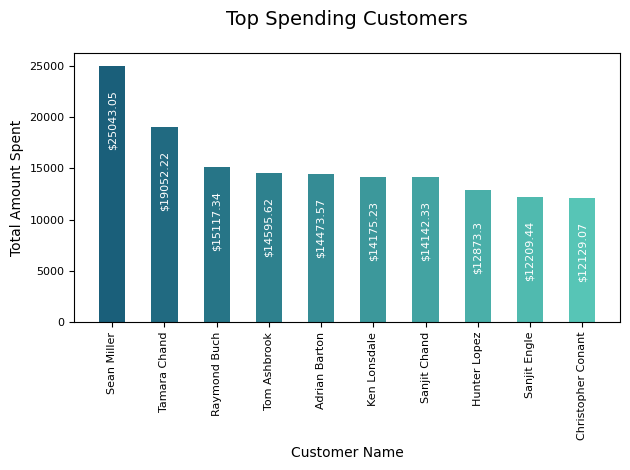

In [65]:
color_map = LinearSegmentedColormap.from_list('my_colors', ['#1A5F7A', '#57C5B6'])

plt.title("Top Spending Customers", fontsize=14, pad=20) 
plt.bar(customers["Customer Name"], customers["Sales"], width=0.5, color=color_map(np.linspace(0, 1, len(customers))))
plt.xlabel("Customer Name",fontsize=10) 
plt.ylabel("Total Amount Spent",fontsize=10) 
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
for x,y in customers["Sales"].items(): 
    plt.text(x,y-8000,'$'+ str(y), fontsize=8,rotation=90, color='white',horizontalalignment='center')

plt.tight_layout()
plt.savefig('../images/top_spending_customers.png')

In [75]:
states = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(10)
states = states[["Sales"]].round(2)
states.reset_index(inplace=True)

C:\Users\Celia\AppData\Local\Temp\ipykernel_8680\2554393133.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  states = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(10)


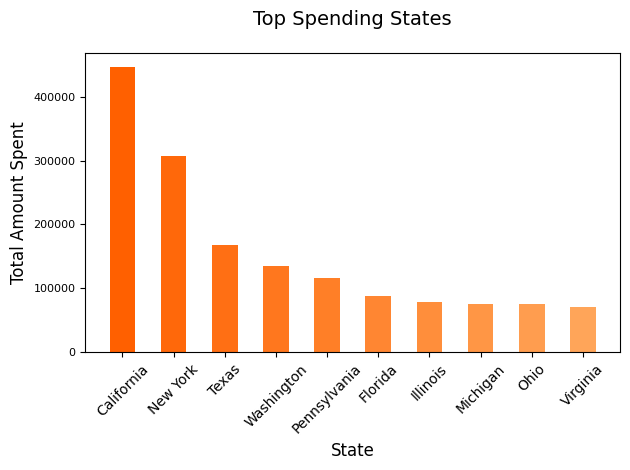

In [97]:
color_map = LinearSegmentedColormap.from_list('my_colors', ['#FF6000', '#FFA559'])

plt.title("Top Spending States", fontsize=14, pad=20) 
plt.bar(states["State"], states["Sales"], width=0.5, color=color_map(np.linspace(0, 1, len(states))))
plt.xlabel("State",fontsize=12) 
plt.ylabel("Total Amount Spent",fontsize=12) 
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.savefig('../images/top_spending_states.png')

In [86]:
cities = df.groupby(["City"]).sum().sort_values("Sales", ascending=False).head(10)
cities = cities[["Sales"]].round(2)
cities.reset_index(inplace=True)

C:\Users\Celia\AppData\Local\Temp\ipykernel_8680\22778865.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cities = df.groupby(["City"]).sum().sort_values("Sales", ascending=False).head(10)


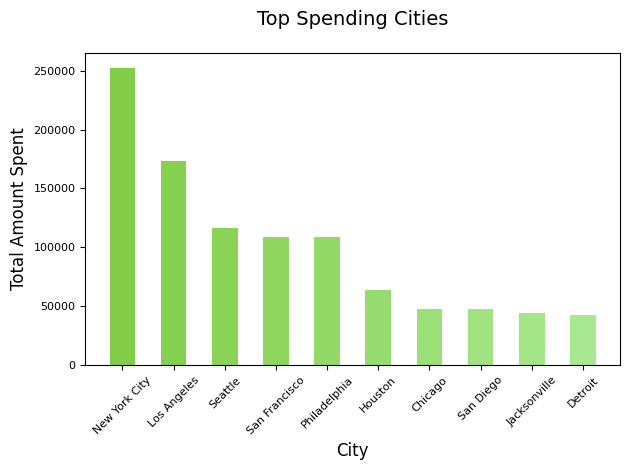

In [99]:
color_map = LinearSegmentedColormap.from_list('my_colors', ['#82CD47', '#A8E890'])

plt.title("Top Spending Cities", fontsize=14, pad=20) 
plt.bar(cities["City"], cities["Sales"], width=0.5, color=color_map(np.linspace(0, 1, len(states))))
plt.xlabel("City",fontsize=12) 
plt.ylabel("Total Amount Spent",fontsize=12) 
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.savefig('../images/top_spending_cities.png')

In [100]:
category = df.groupby(["Category"]).sum().sort_values("Sales", ascending=False)
category = category[["Sales"]]
category.reset_index(inplace=True)

C:\Users\Celia\AppData\Local\Temp\ipykernel_8680\2800015670.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category = df.groupby(["Category"]).sum().sort_values("Sales", ascending=False)


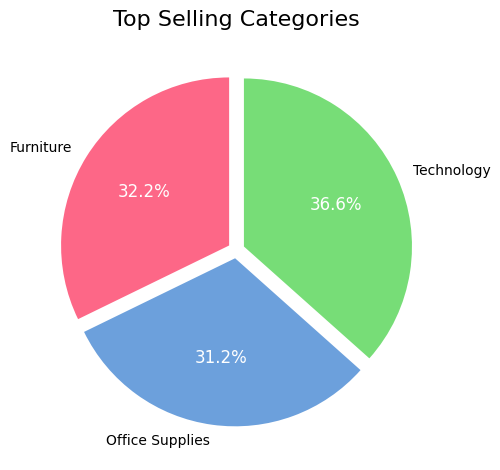

In [224]:
colors = ['#FD6787', '#6CA0DC', '#77DD77']

explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
plt.title("Top Selling Categories", fontsize=16, pad=10) 
pie = ax1.pie(category['Sales'], colors = colors, labels=category['Category'], startangle=90, autopct='%1.1f%%', explode=explode)
for text in pie[2]:
    text.set_color('white')
    text.set_size(12)

plt.tight_layout()
plt.savefig('../images/top_selling_categories.png')

In [141]:
products = df.groupby(["Product Name"]).sum().sort_values("Sales",ascending=False).head(8)
products = products[["Sales"]].round(2)
products.reset_index(inplace=True)

C:\Users\Celia\AppData\Local\Temp\ipykernel_8680\18772612.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  products = df.groupby(["Product Name"]).sum().sort_values("Sales",ascending=False).head(8)


C:\Users\Celia\AppData\Local\Temp\ipykernel_8680\1619846747.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 3000x3000 with 0 Axes>

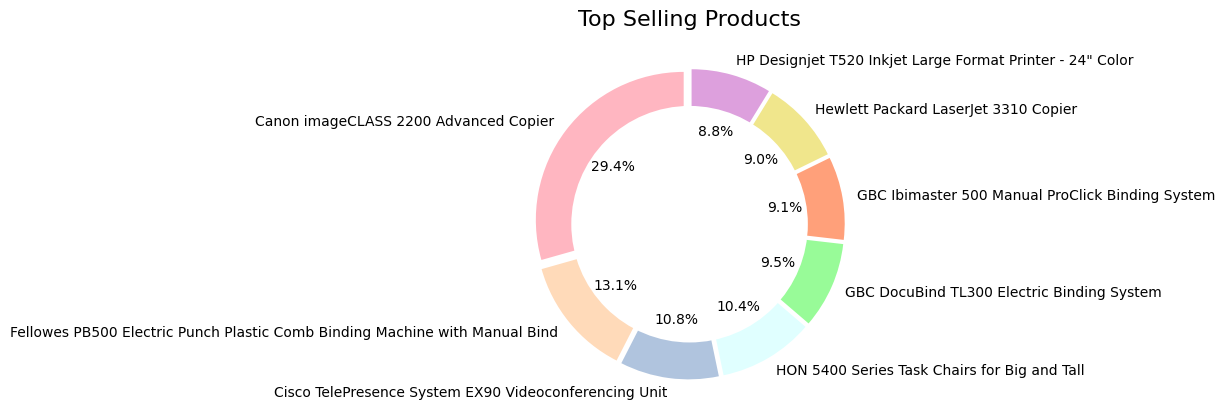

In [175]:
colors = ['#FFB6C1', '#FFDAB9', '#B0C4DE', '#E0FFFF', '#98FB98', '#FFA07A', '#F0E68C', '#DDA0DD']

plt.figure(figsize=(30,30))
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
plt.title("Top Selling Products", fontsize=16, pad=10) 
pie = ax1.pie(products['Sales'], colors = colors, labels=products['Product Name'], startangle=90, autopct='%1.1f%%', explode=explode)

centre_circle = plt.Circle((0,0),0.8,fc='white') 
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('../images/top_selling_products.png', bbox_inches='tight')

In [186]:
df['Sub-Category'].nunique()

17

In [206]:
subcat = df.groupby(['Category','Sub-Category']).sum().sort_values("Sales", ascending=False).head(10)
subcat = subcat[["Sales"]].round(2)
subcat = subcat.sort_values("Category")
subcat.reset_index(inplace=True)

C:\Users\Celia\AppData\Local\Temp\ipykernel_8680\494673391.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subcat = df.groupby(['Category','Sub-Category']).sum().sort_values("Sales", ascending=False).head(10)


In [214]:
subcat_group = subcat.groupby(['Category']).sum()
subcat_group.reset_index(inplace=True)

C:\Users\Celia\AppData\Local\Temp\ipykernel_8680\3388146142.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subcat_group = subcat.groupby(['Category']).sum()


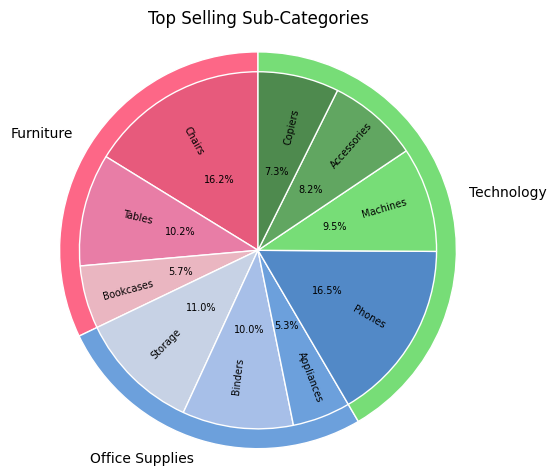

In [257]:
fig, ax = plt.subplots()
ax.axis('equal')
ax.pie(subcat_group['Sales'], labels=subcat_group['Category'], autopct='%1.1f%%', startangle=90, colors=['#FD6787', '#6CA0DC', '#77DD77'], radius=1, wedgeprops=dict(edgecolor='w'))
ax2 = ax.twinx()
pie2 = ax2.pie(subcat['Sales'], labels=subcat['Sub-Category'], autopct='%1.1f%%', colors=['#E75A7C', '#E87DA6', '#EAB6C1', '#C7D2E5', '#A7BFE8', '#6CA0DC', '#5289C7', '#77DD77', '#61A661', '#4E8A4E']
, radius=0.9, startangle=90, labeldistance=0.60,wedgeprops=dict(edgecolor='w'), pctdistance=0.45,rotatelabels =True)

for text in pie2[1]:
    text.set_size(7)
for text in pie2[2]:
    text.set_size(7)
ax.set_title('Top Selling Sub-Categories', pad=30)

plt.savefig('../images/top_selling_subcategories.png')